In [1]:
library(data.table) 
library(ggplot2)
library(ComplexUpset)
library(repr)

## Upset plot for hashtag identification of hashing deconvolution methods

### Define a function to convert the result to a binary matrix 

In [2]:
convert2binary <- function(assignment, identity){
    # table in a long format
    assignment_new <- melt(assignment, id.vars=1)
    assignment_new <- na.omit(assignment_new)
 
    # Subset to identity
    assignment_new <- assignment_new[assignment_new$value==identity,]
    assignment_new <- assignment_new [, -3]

    # table in a wide format
    assignment_new <- dcast(assignment_new, Barcode~variable)
    assignment_new <- as.data.frame(lapply(assignment_new [, -1], as.numeric))

    # turn into a binary matrix
    assignment_new[!is.na(assignment_new)] <- 1
    assignment_new[is.na(assignment_new)] <- 0
    
    return(assignment_new)
}

In [3]:
# Load hashing deconvolution results
hash_gx12_assign <-fread("../data/pipeline_output/gx12/hash_assignment_all.csv")

# Remove the trial ID
colnames(hash_gx12_assign) <- gsub("_1", "", colnames(hash_gx12_assign))

# Subset by only those cells detected by RNA
white_list_gx12 <- fread("../data/dataset/barcodes_gx12.tsv", header = F)$V1
hash_gx12_assign <- hash_gx12_assign[Barcode %in% white_list_gx12,]

# Remove TotalSeqA suffix
hash_gx12_assign$htodemux <- gsub("-TotalSeqA", "", hash_gx12_assign$htodemux)
hash_gx12_assign$multiseq <- gsub("-TotalSeqA", "", hash_gx12_assign$multiseq)
hash_gx12_assign$demuxem <- gsub("_TotalSeqA", "", hash_gx12_assign$demuxem)
hash_gx12_assign$hashsolo <- gsub("_TotalSeqA", "", hash_gx12_assign$hashsolo)

# Rename HashedDrops donor
hash_gx12_assign$hashedDrops <- ifelse(hash_gx12_assign$hashedDrops != 'negative', 
                                        paste0("Hash45", hash_gx12_assign$hashedDrops), 
                                        hash_gx12_assign$hashedDrops)


head(hash_gx12_assign)

Barcode,demuxem,hashsolo,htodemux,multiseq,hashedDrops
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGGTGTGAC-1,Hash454,Hash453,Hash453,Hash454,negative
AAACCCAGTGAGAGGG-1,Hash453,Hash453,negative,doublet,NA
AAACGAAAGAATCTAG-1,negative,Hash453,negative,negative,negative
AAACGAACACATATGC-1,Hash456,Hash453,negative,negative,negative
AAACGAACACGACTAT-1,Hash452,Hash453,Hash453,Hash452,negative
AAACGAACATCAGCAT-1,negative,Hash453,Hash453,negative,negative


Using 'variable' as value column. Use 'value.var' to override



Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.
ℹ The deprecated feature was likely used in the ComplexUpset package.
  Please report the issue at
  <https://github.com/krassowski/complex-upset/issues>.”


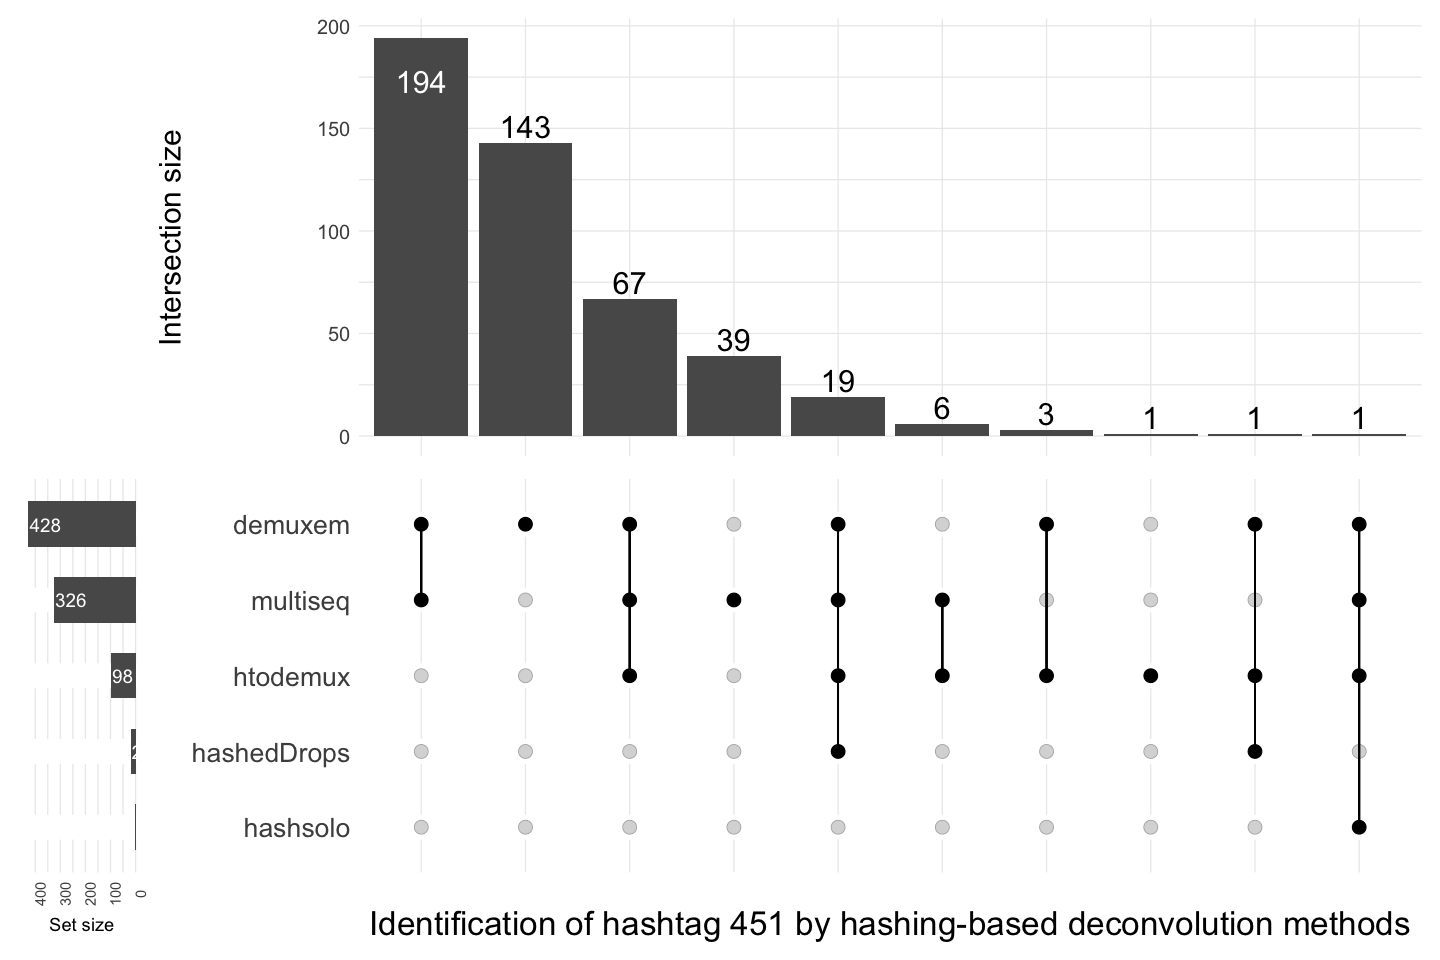

In [4]:
# convert to binary matrix
hash_ht451 <- convert2binary(hash_gx12_assign, 'Hash451')

# Change plot size to 12 x 8
options(repr.plot.width=12, repr.plot.height=8)

ComplexUpset::upset(hash_ht451, colnames(hash_ht451), width_ratio = 0.1, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 451 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count..), hjust = -0.05, stat = 'count', color = 'white', size=4) +
                               theme(axis.text.x = element_text(angle = 90))),# set size
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=6.5))+
                                        theme(axis.text=element_text(size=12), axis.title=element_text(size=18))), # intersection size
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=16), #method
                                                                                text=element_text(size=20)))))# title

# ggsave("S4-upset-hashing-hashtag451-gx12.png", width= 12, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



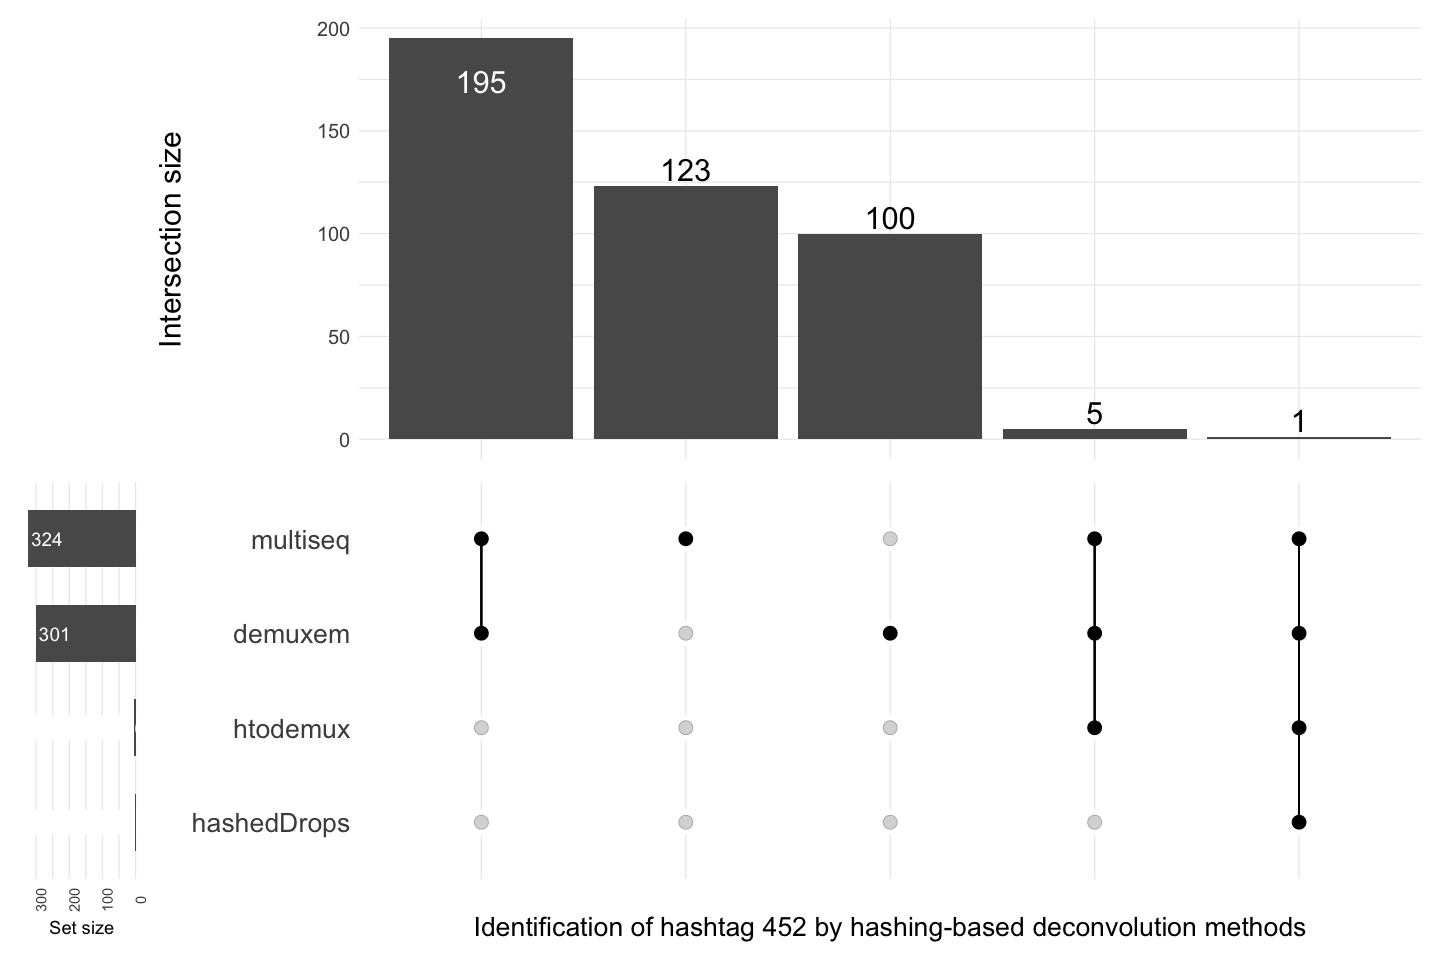

In [5]:
# convert to binary matrix
hash_ht452 <- convert2binary(hash_gx12_assign, 'Hash452')

ComplexUpset::upset(hash_ht452, colnames(hash_ht452), width_ratio = 0.1, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 452 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count..), hjust = -0.1, stat = 'count', color = 'white', size=4) +
                               theme(axis.text.x = element_text(angle = 90))),# set size
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=6.5))+
                                        theme(axis.text=element_text(size=12), axis.title=element_text(size=18))), # intersection size
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=16), #method
                                                                                text=element_text(size=16)))))# title
# ggsave("S5-upset-hashing-hashtag452-gx12.png", width= 10, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



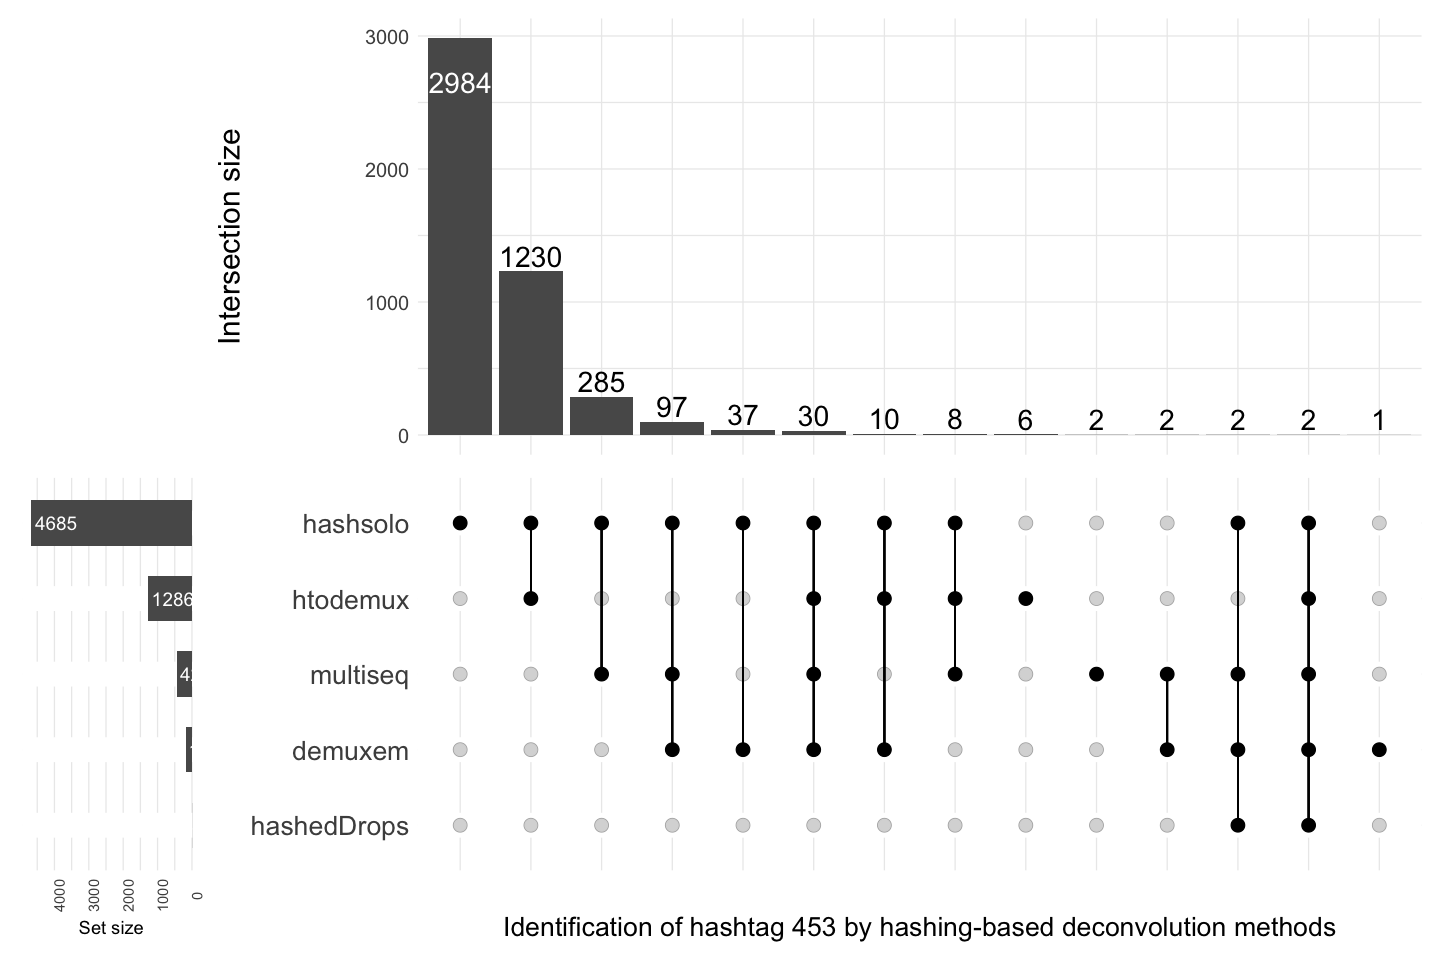

In [6]:
# convert to binary matrix
hash_ht453 <- convert2binary(hash_gx12_assign, 'Hash453')

ComplexUpset::upset(hash_ht453, colnames(hash_ht453), width_ratio = 0.15, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 453 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count..), hjust = -0.1, stat = 'count', color = 'white', size=4) +
                               theme(axis.text.x = element_text(angle = 90))),# set size
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=6))+
                                        theme(axis.text=element_text(size=12), axis.title=element_text(size=18))), # intersection size
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=16), #method
                                                                                text=element_text(size=16)))))# title

# ggsave("S6-upset-hashing-hashtag453-gx12.png", width= 12, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



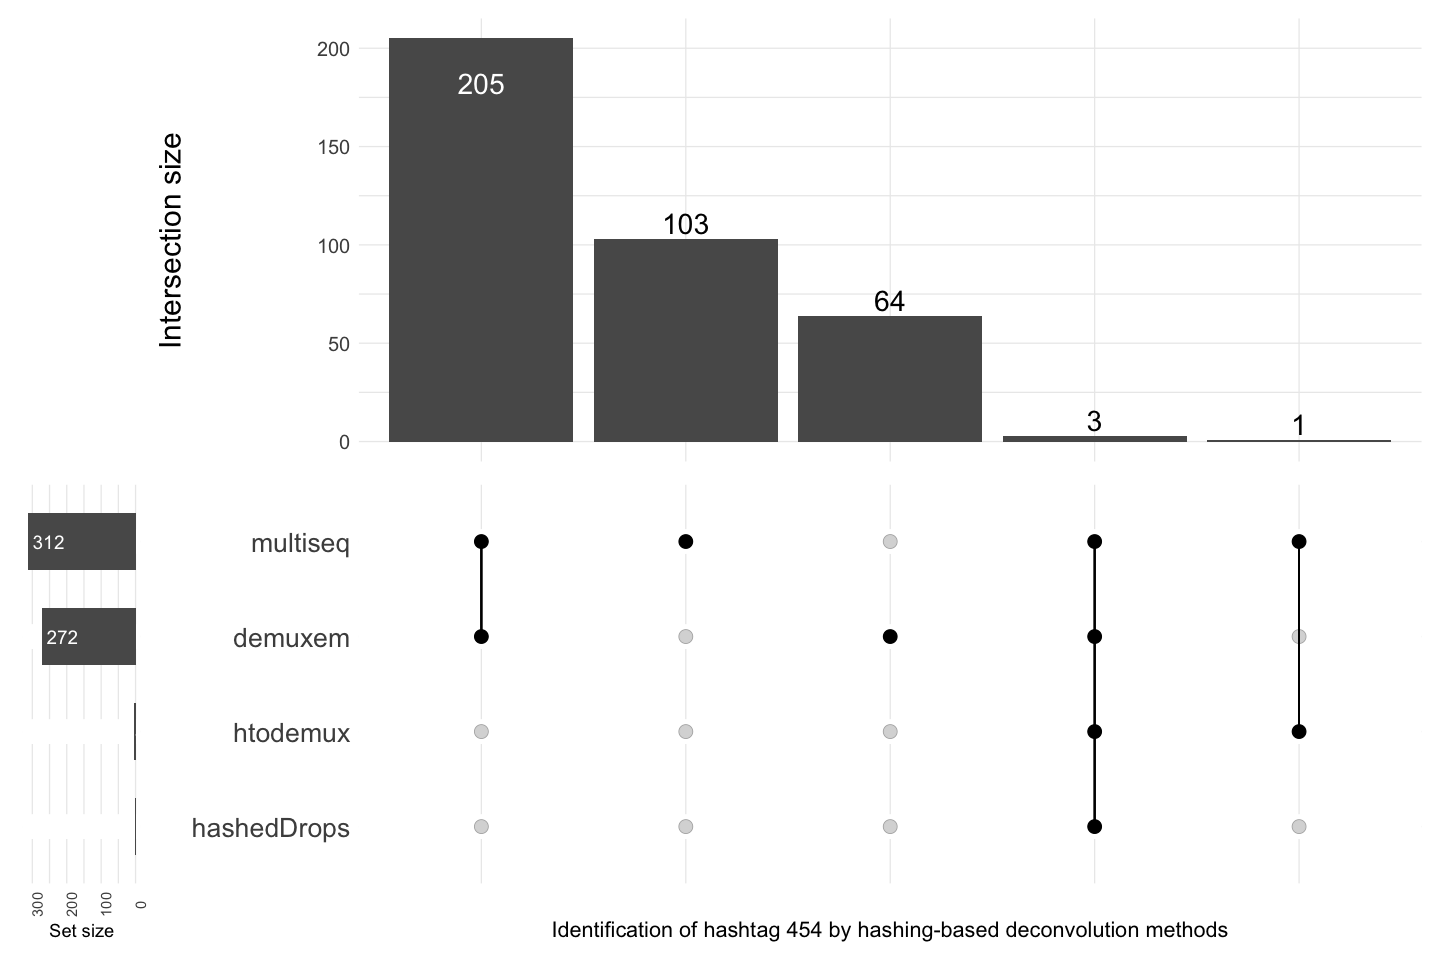

In [7]:
# convert to binary matrix
hash_ht454 <- convert2binary(hash_gx12_assign, 'Hash454')

ComplexUpset::upset(hash_ht454, colnames(hash_ht454), width_ratio = 0.1, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 454 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count..), hjust = -0.15, stat = 'count', color = 'white', size=4) +
                               theme(axis.text.x = element_text(angle = 90))),# set size
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=6))+
                                        theme(axis.text=element_text(size=12), axis.title=element_text(size=18))), # intersection size
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=16), #method
                                                                                text=element_text(size=13)))))# title

# ggsave("S7-upset-hashing-hashtag454-gx12.png", width= 9, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



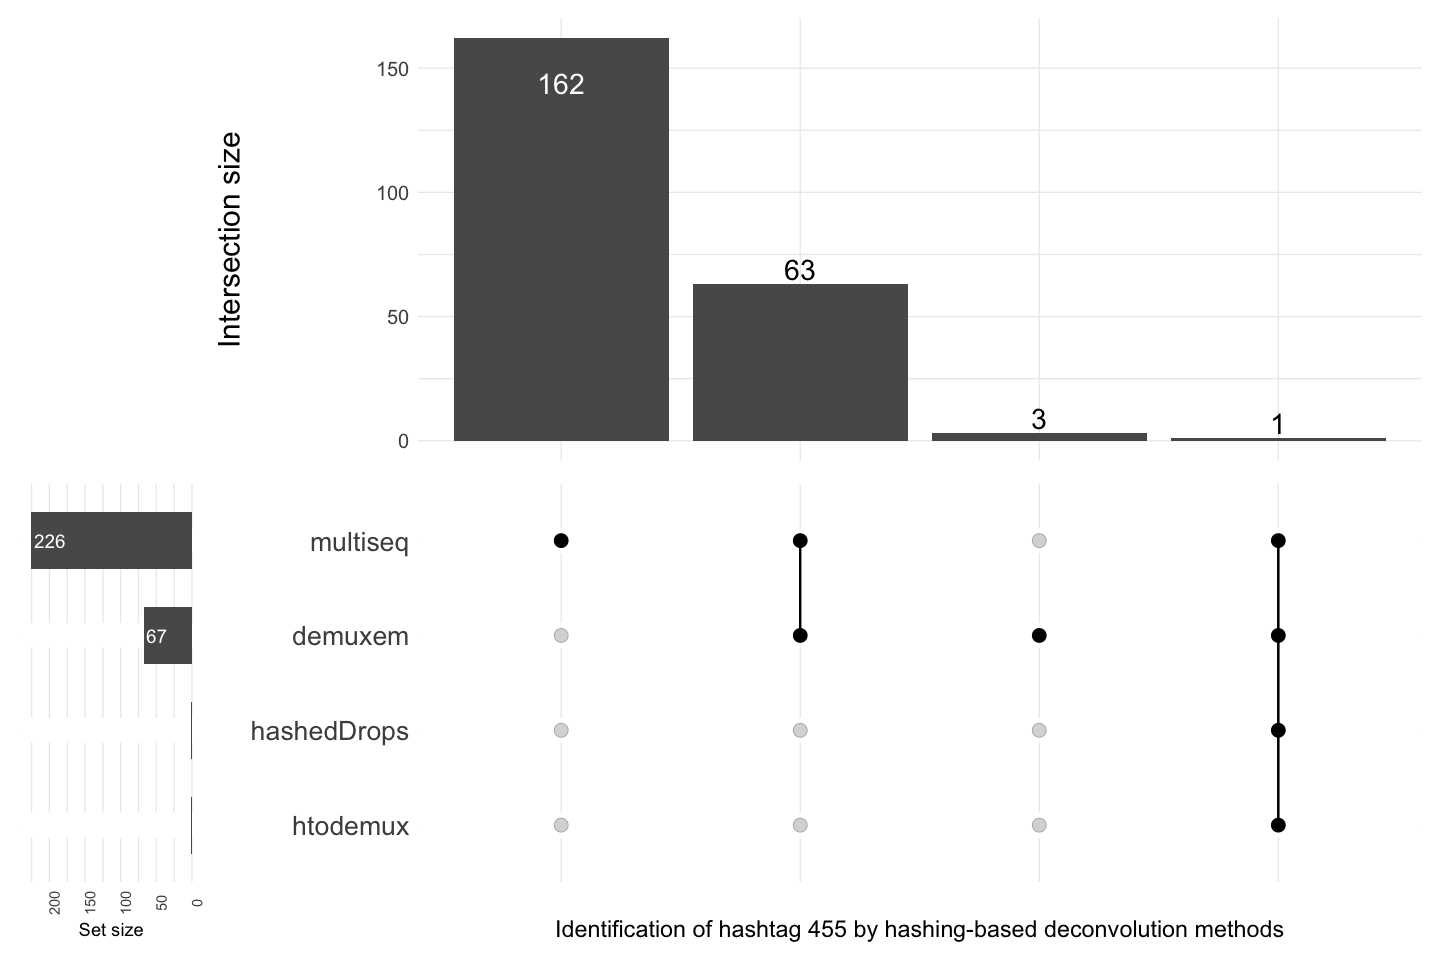

In [8]:
# convert to binary matrix
hash_ht455 <- convert2binary(hash_gx12_assign, 'Hash455')

ComplexUpset::upset(hash_ht455, colnames(hash_ht455), width_ratio = 0.15, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 455 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count..), hjust = -0.1, stat = 'count', color = 'white', size=4) +
                               theme(axis.text.x = element_text(angle = 90))),# set size
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=6))+
                                        theme(axis.text=element_text(size=12), axis.title=element_text(size=18))), # intersection size
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=16), #method
                                                                                text=element_text(size=14)))))# title

# ggsave("S8-upset-hashing-hashtag455-gx12.png", width= 9, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



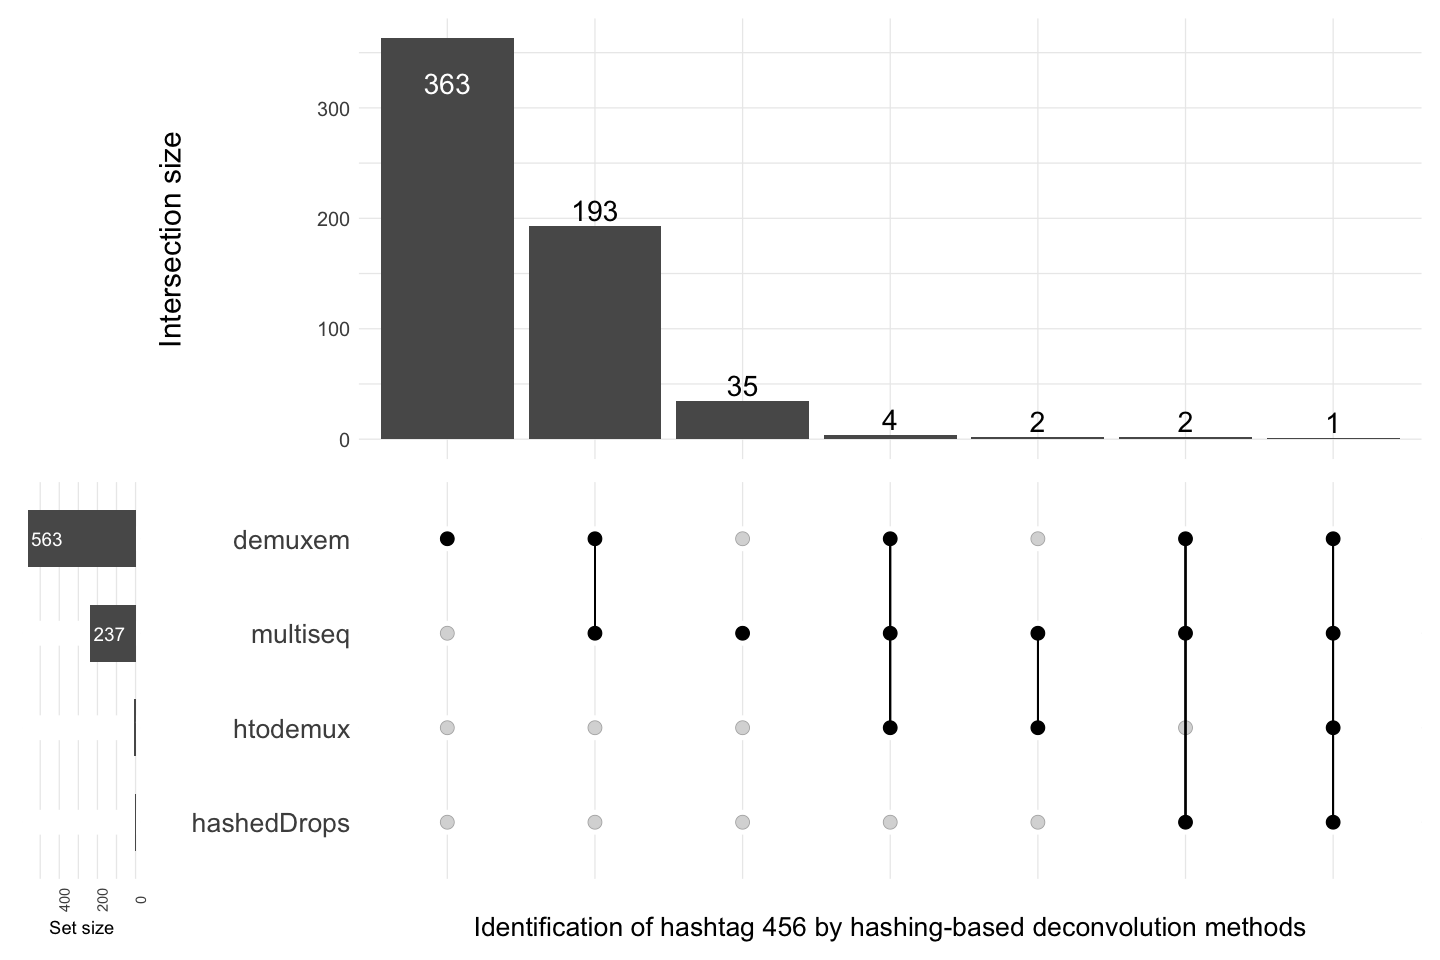

In [9]:
# convert to binary matrix
hash_ht456 <- convert2binary(hash_gx12_assign, 'Hash456')

ComplexUpset::upset(hash_ht456, colnames(hash_ht456), width_ratio = 0.1, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 456 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count..), hjust = -0.1, stat = 'count', color = 'white', size=4) +
                               theme(axis.text.x = element_text(angle = 90))),# set size
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=6))+
                                        theme(axis.text=element_text(size=12), axis.title=element_text(size=18))), # intersection size
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=16), #method
                                                                                text=element_text(size=16)))))# title


# ggsave("S9-upset-hashing-hashtag456-gx12.png", width= 10, height=8, dpi=300)